<a href="https://colab.research.google.com/github/tmoore-byte/MGSC-410/blob/main/RosettaStone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Rosetta Stone Project


*  Identifying most valuable subscribers

* Understanding Subscriber segments in each database

* Identifying most likely subscribers that could be sold an additional service

* Outlining any business relevant opportunities that are present




<h2> Imports


In [ ]:
# additional imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn import *
# Linear Regression Model
from sklearn.linear_model import LinearRegression
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
#Z-score variables
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
# simple TT split cv
from sklearn.model_selection import train_test_split
# k-fold cv
from sklearn.model_selection import KFold
#LOO cv
from sklearn.model_selection import LeaveOneOut
# cross validation metrics
from sklearn.model_selection import cross_val_score
# cross validation metrics
from sklearn.model_selection import cross_val_predict
# model eval
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
%matplotlib inline

import csv

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# reading in data

df = pd.read_csv("https://raw.githubusercontent.com/tmoore-byte/MGSC-410/main/subscriptionData.csv")

In [ ]:
df.head()
#num_null3 = df.isnull().sum()
#print(num_null3)

,ID,App.Session.Platform,App.Activity.Type,Language,Subscription.Type,Subscription.Event.Type,Purchase.Store,Purchase.Amount,Currency,Demo.User,...,Push.Notifications,Send.Count,Unique.Open.Count,Unique.Click.Count,subscriptionLength_months,UniqueOpenRate,UniqueClickRate,unique Currencies,Exchange rates,Purchase.Amount.USD
0,2,android,App Launch,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,0,...,1,4,1,0,3,0.25,0.00,USD,1.00,39.00
1,3,ios,App Launch,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,0,...,1,1,0,0,12,0.00,0.00,GBP,0.80,0.00
2,6,android,Completed,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,1,...,1,162,1,0,3,0.01,0.00,EUR,0.95,38.34
3,7,android,Start,ESP,Limited,RENEWAL,Web,79.00,USD,1,...,1,2,0,0,4,0.00,0.00,CHF,0.97,79.00
4,8,ios,Completed,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,1,...,1,25,7,2,3,0.28,0.08,CAD,1.28,38.40


In [ ]:
df.shape

(331661, 26)

<h2> Data Plotting / Visuals

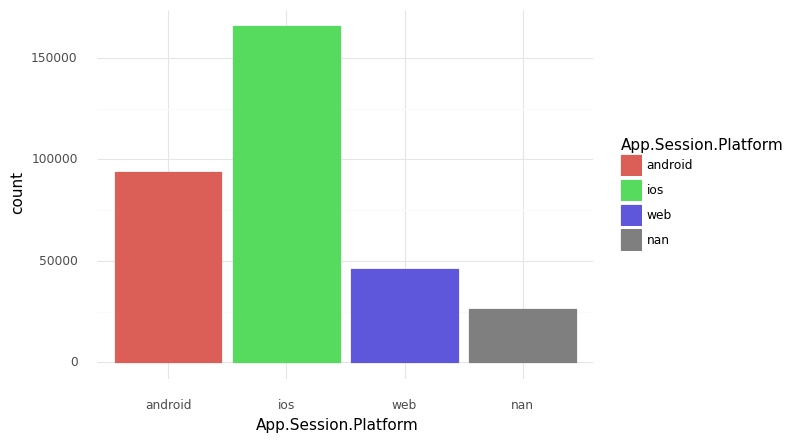

<ggplot: (8777556780093)>

In [ ]:
(ggplot(df, aes(x = "App.Session.Platform", fill = "App.Session.Platform",
                color = "App.Session.Platform")) +
 geom_bar()+theme_minimal())

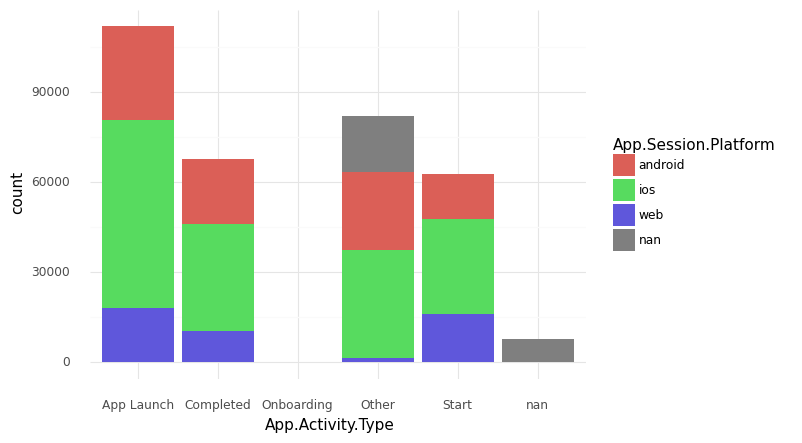

<ggplot: (8786531088153)>

In [ ]:
(ggplot(df, aes(x = "App.Activity.Type", fill = "App.Session.Platform")) +
 geom_bar()+theme_minimal())

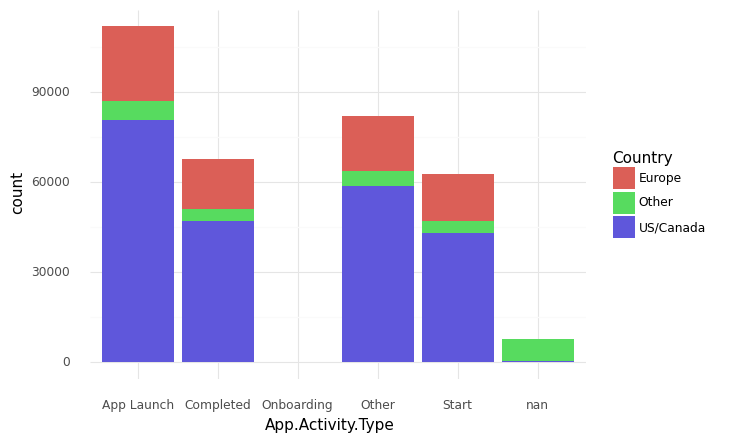

<ggplot: (8786534727489)>

In [ ]:
(ggplot(df, aes(x = "App.Activity.Type", fill = "Country")) +
 geom_bar()+theme_minimal())

Android and IOS are most used platforms, and also have the highest applaunch count and completion count. Web is lowest in each category. US/Canada have highest app launch and completion, followed by Europe. 

In [ ]:
# selecting rows w IOS/Android US/canada
platform = "ios"
platform2 = "android"
country = "US/Canada"

# selecting columns
df['App.Session.Platform'] == 'ios'


0         False
1          True
2         False
3         False
4          True
          ...  
331656    False
331657    False
331658    False
331659    False
331660     True
Name: App.Session.Platform, Length: 331661, dtype: bool

In [ ]:
ios = df[df['App.Session.Platform'] == 'ios']
ios

,ID,App.Session.Platform,App.Activity.Type,Language,Subscription.Type,Subscription.Event.Type,Purchase.Store,Purchase.Amount,Currency,Demo.User,...,Push.Notifications,Send.Count,Unique.Open.Count,Unique.Click.Count,subscriptionLength_months,UniqueOpenRate,UniqueClickRate,unique Currencies,Exchange rates,Purchase.Amount.USD
1,3,ios,App Launch,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,0,...,1,1,0,0,12,0.00,0.00,GBP,0.80,0.00
4,8,ios,Completed,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,1,...,1,25,7,2,3,0.28,0.08,CAD,1.28,38.40
6,12,ios,Other,ESP,Limited,INITIAL_PURCHASE,Web,35.97,USD,0,...,1,94,0,0,3,0.00,0.00,JPY,130.59,35.97
7,13,ios,App Launch,GLE,Limited,RENEWAL,Web,10.83,GBP,0,...,1,70,2,0,14,0.03,0.00,TRY,14.79,13.54
8,14,ios,Completed,ALL,Limited,INITIAL_PURCHASE,Web,143.76,USD,0,...,1,174,28,2,24,0.16,0.01,AUD,1.40,143.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331650,2831,ios,Completed,ALL,Limited,INITIAL_PURCHASE,Web,95.88,USD,1,...,1,9,3,0,12,0.33,0.00,NaN,NaN,95.88
331651,3075,ios,Completed,FRA,Limited,INITIAL_PURCHASE,Web,0.00,USD,0,...,1,2,1,0,12,0.50,0.00,NaN,NaN,0.00
331652,904,ios,App Launch,ARA,Limited,INITIAL_PURCHASE,Web,0.00,USD,0,...,1,2,0,0,18,0.00,0.00,NaN,NaN,0.00
331653,2831,ios,Completed,ALL,Limited,INITIAL_PURCHASE,Web,95.88,USD,1,...,1,9,3,0,12,0.33,0.00,NaN,NaN,95.88


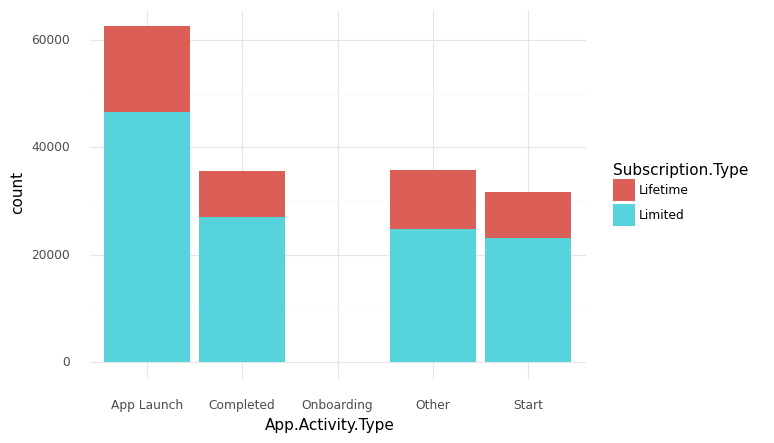

<ggplot: (8789891870141)>

In [ ]:
# ios plot with Subscription type 
# p much all CONSUMER USER TYPE
(ggplot(ios, aes(x = "App.Activity.Type", fill = "Subscription.Type")) +
 geom_bar()+theme_minimal())

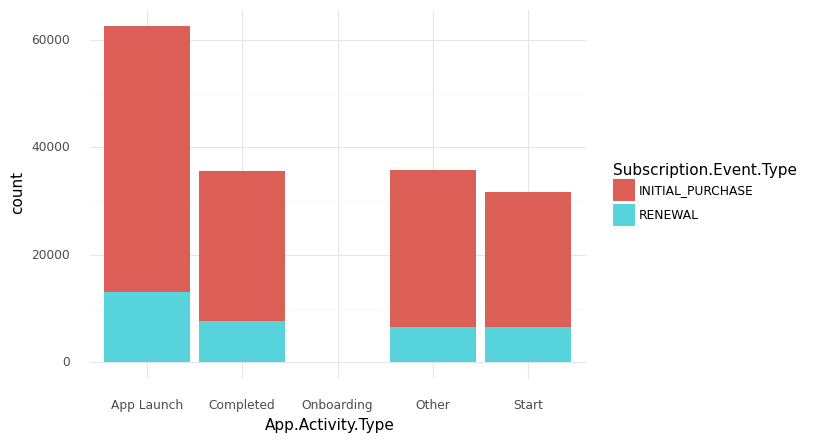

<ggplot: (8786527858293)>

In [ ]:
(ggplot(ios, aes(x = "App.Activity.Type", fill = "Subscription.Event.Type")) +
 geom_bar()+theme_minimal())

In [ ]:
android = df[df['App.Session.Platform'] == 'android']
android

,ID,App.Session.Platform,App.Activity.Type,Language,Subscription.Type,Subscription.Event.Type,Purchase.Store,Purchase.Amount,Currency,Demo.User,...,Push.Notifications,Send.Count,Unique.Open.Count,Unique.Click.Count,subscriptionLength_months,UniqueOpenRate,UniqueClickRate,unique Currencies,Exchange rates,Purchase.Amount.USD
0,2,android,App Launch,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,0,...,1,4,1,0,3,0.25,0.00,USD,1.00,39.00
2,6,android,Completed,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,1,...,1,162,1,0,3,0.01,0.00,EUR,0.95,38.34
3,7,android,Start,ESP,Limited,RENEWAL,Web,79.00,USD,1,...,1,2,0,0,4,0.00,0.00,CHF,0.97,79.00
10,18,android,App Launch,SVE,Limited,INITIAL_PURCHASE,Web,79.50,GBP,0,...,1,2,1,0,19,0.50,0.00,ILS,3.32,99.38
12,23,android,Completed,ESP,Lifetime,INITIAL_PURCHASE,Web,0.00,USD,1,...,1,2,0,0,957,0.00,0.00,SGD,1.38,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331640,10902,android,App Launch,ALL,Lifetime,INITIAL_PURCHASE,Web,219.10,USD,0,...,1,4,0,0,959,0.00,0.00,NaN,NaN,219.10
331641,961,android,Completed,EBR,Limited,INITIAL_PURCHASE,Web,20.87,EUR,1,...,1,21,3,1,12,0.14,0.05,NaN,NaN,21.97
331642,8036,android,Other,ITA,Limited,INITIAL_PURCHASE,Web,0.00,USD,0,...,1,4,2,1,12,0.50,0.25,NaN,NaN,0.00
331654,3740,android,Completed,ESP,Limited,RENEWAL,App,54990000.00,USD,0,...,1,3,0,0,12,0.00,0.00,NaN,NaN,54990000.00


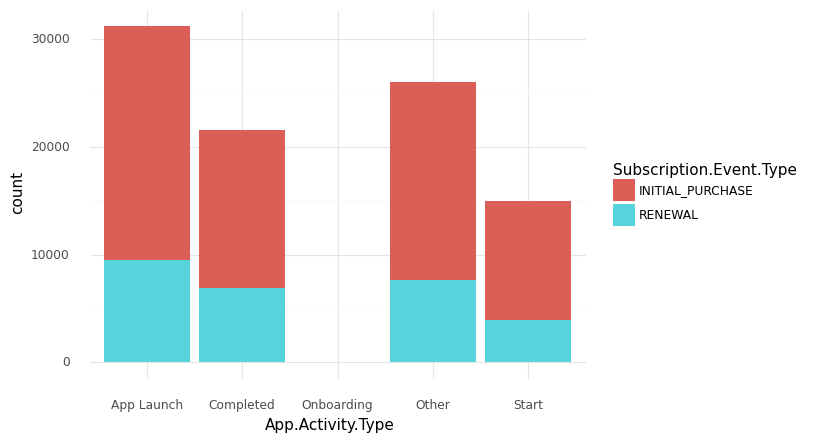

<ggplot: (8786527443181)>

In [ ]:
# android plot with renewal type 
# p much all CONSUMER USER TYPE
(ggplot(android, aes(x = "App.Activity.Type", fill = "Subscription.Event.Type")) +
 geom_bar()+theme_minimal())

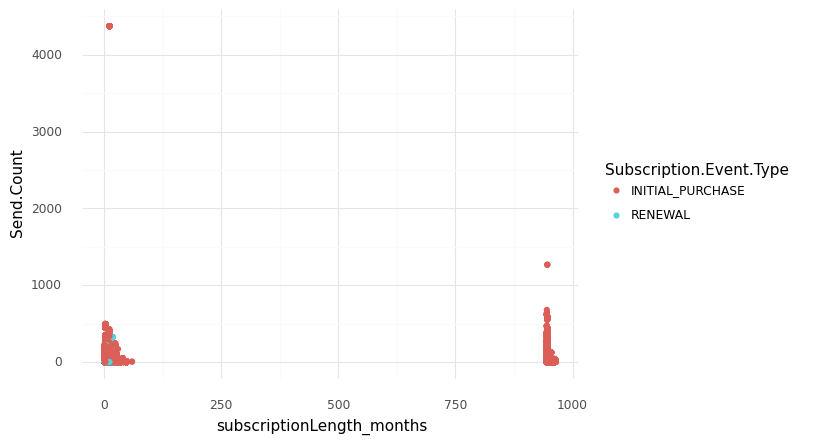

<ggplot: (8786527757833)>

In [ ]:
(ggplot(df, aes(x = "subscriptionLength_months", y = "Send.Count", color = "Subscription.Event.Type")) +
 geom_point() + theme_minimal())

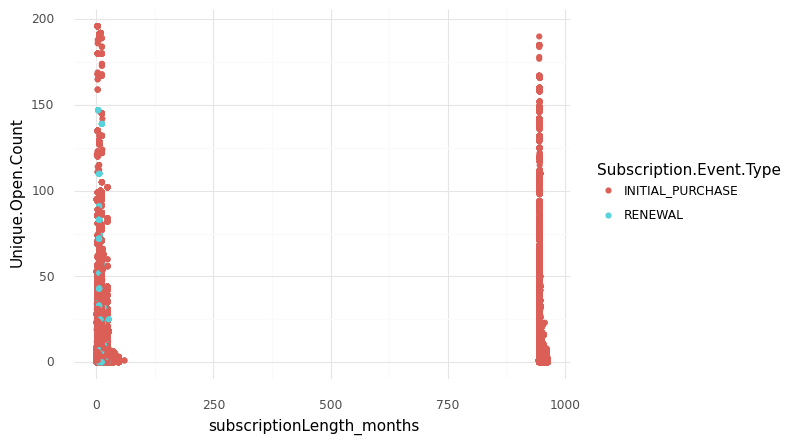

<ggplot: (8786511777965)>

In [ ]:
(ggplot(df, aes(x = "subscriptionLength_months", y = "Unique.Open.Count",
                color= "Subscription.Event.Type")) +
 geom_point() + theme_minimal())

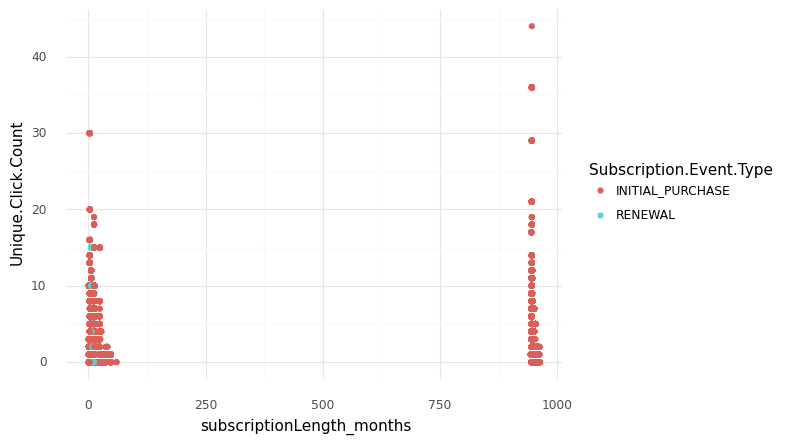

<ggplot: (8786507993249)>

In [ ]:
(ggplot(df, aes(x = "subscriptionLength_months", y = "Unique.Click.Count",
                color="Subscription.Event.Type")) +
 geom_point() + theme_minimal())

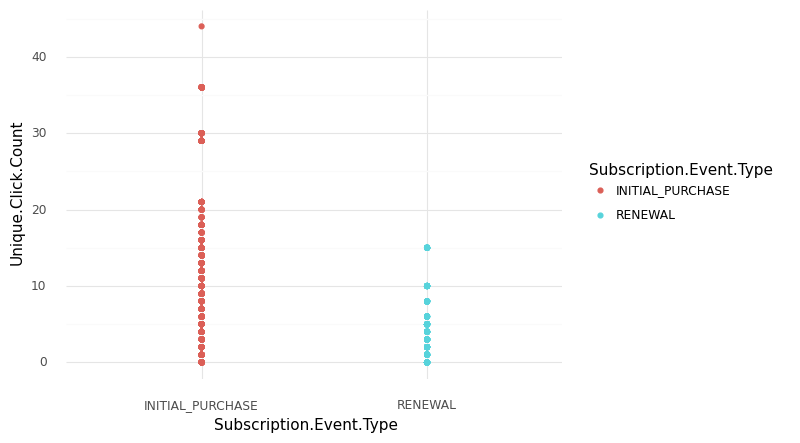

<ggplot: (8786514210641)>

In [ ]:
(ggplot(df, aes(x = "Subscription.Event.Type", y = "Unique.Click.Count",
                color="Subscription.Event.Type")) +
 geom_point() + theme_minimal())

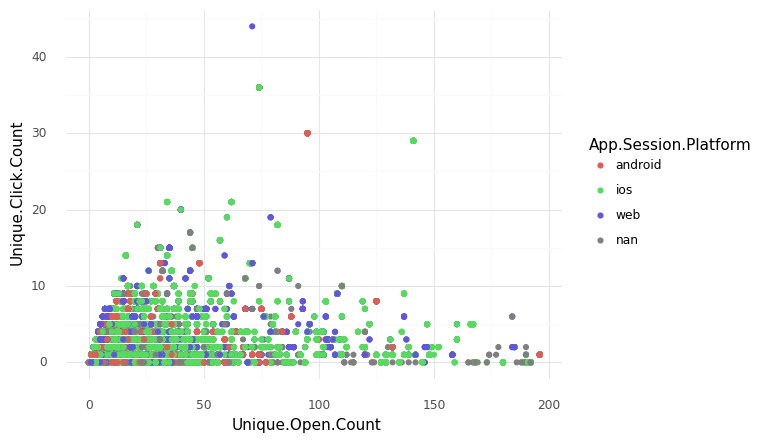

<ggplot: (8786510584497)>

In [ ]:
(ggplot(df, aes(x = "Unique.Open.Count", y = "Unique.Click.Count",
                color="App.Session.Platform")) +
 geom_point() + theme_minimal())

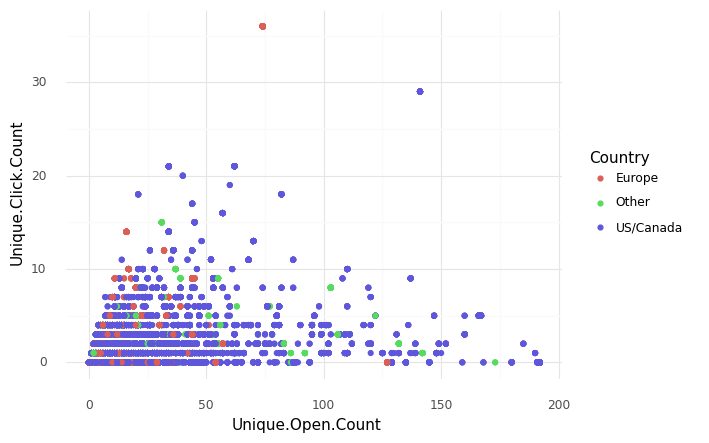

<ggplot: (8786498717509)>

In [ ]:
(ggplot(ios, aes(x = "Unique.Open.Count", y = "Unique.Click.Count",
                 color="Country")) +
 geom_point() + theme_minimal())

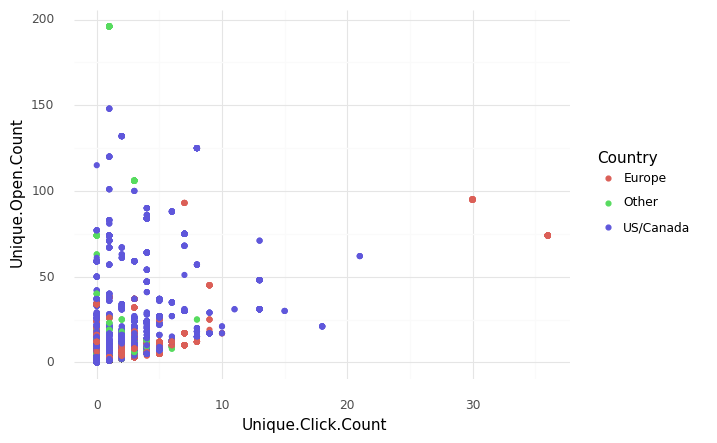

<ggplot: (8786493125069)>

In [ ]:
(ggplot(android, aes(x = "Unique.Click.Count", y = "Unique.Open.Count",
                 color="Country")) +
 geom_point() + theme_minimal())

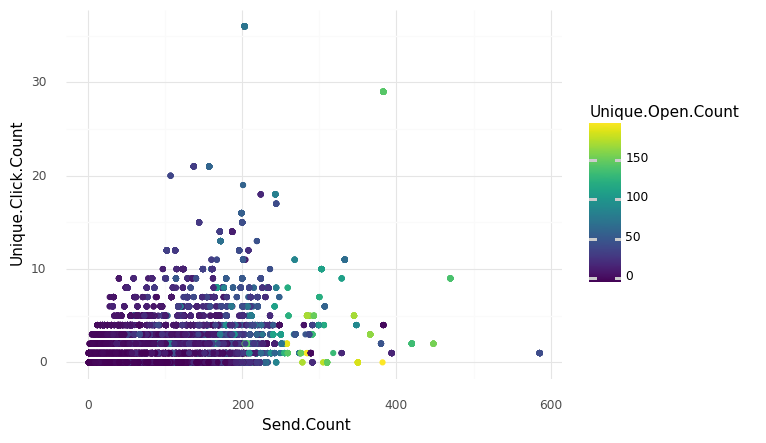

<ggplot: (8786527539349)>

In [ ]:
(ggplot(ios, aes(x = "Send.Count", y = "Unique.Click.Count",
                 color="Unique.Open.Count")) +
 geom_point() + theme_minimal())

In [ ]:
# LOOKING AT WEB DATA
web = df[df['Purchase.Store'] == 'Web']
web.head()

,ID,App.Session.Platform,App.Activity.Type,Language,Subscription.Type,Subscription.Event.Type,Purchase.Store,Purchase.Amount,Currency,Demo.User,...,Push.Notifications,Send.Count,Unique.Open.Count,Unique.Click.Count,subscriptionLength_months,UniqueOpenRate,UniqueClickRate,unique Currencies,Exchange rates,Purchase.Amount.USD
0,2,android,App Launch,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,0,...,1,4,1,0,3,0.25,0.00,USD,1.00,39.00
1,3,ios,App Launch,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,0,...,1,1,0,0,12,0.00,0.00,GBP,0.80,0.00
2,6,android,Completed,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,1,...,1,162,1,0,3,0.01,0.00,EUR,0.95,38.34
3,7,android,Start,ESP,Limited,RENEWAL,Web,79.00,USD,1,...,1,2,0,0,4,0.00,0.00,CHF,0.97,79.00
4,8,ios,Completed,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,1,...,1,25,7,2,3,0.28,0.08,CAD,1.28,38.40


In [ ]:
# WEB DATA


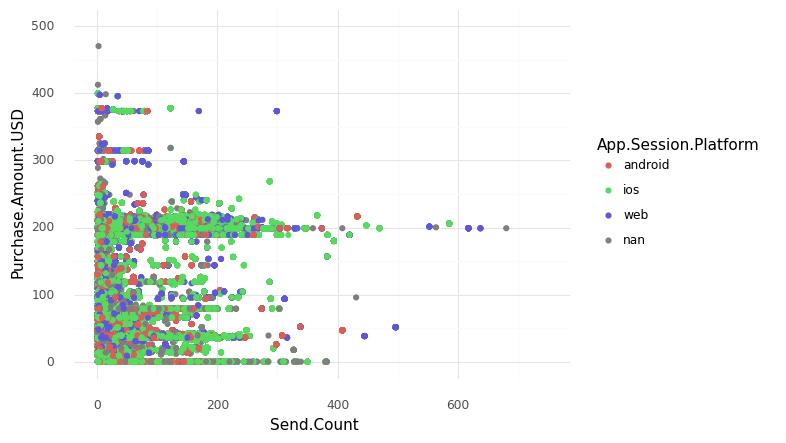

<ggplot: (8777552097085)>

In [ ]:
(ggplot(web, aes(x = "Send.Count", y = "Purchase.Amount.USD",
                 color="App.Session.Platform")) + xlim(-1,750)+ylim(-1,500)+
 geom_point() + theme_minimal())

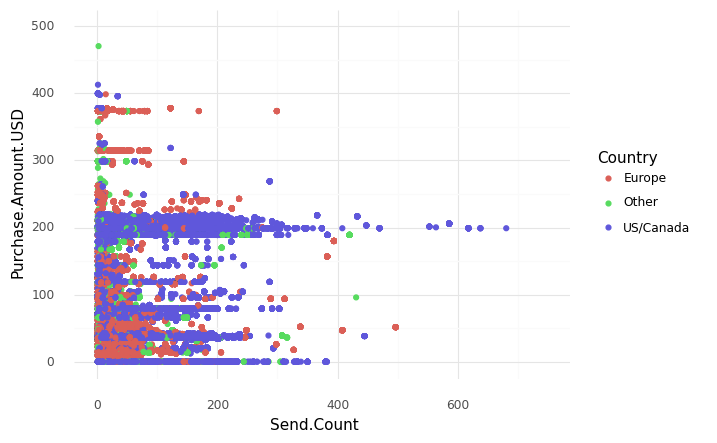

<ggplot: (8777551968137)>

In [ ]:
(ggplot(web, aes(x = "Send.Count", y = "Purchase.Amount.USD",
                 color="Country")) + xlim(-1,750)+ylim(-1,500)+
 geom_point() + theme_minimal())

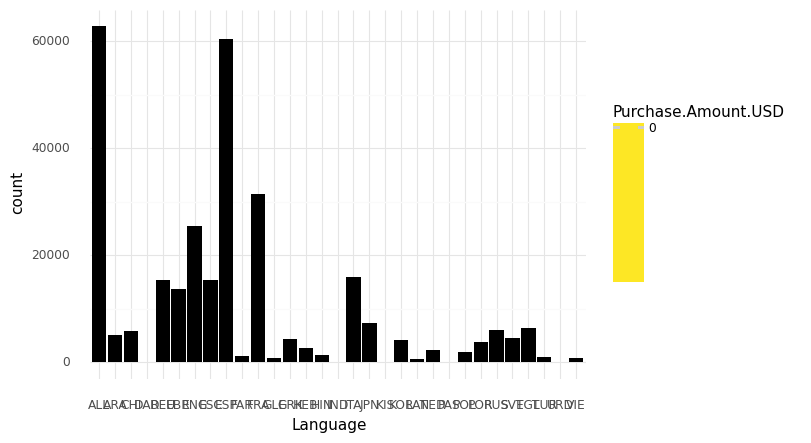

<ggplot: (8777551018885)>

In [ ]:
(ggplot(web, aes(x = "Language", fill = "Purchase.Amount.USD")) +
 geom_bar()+theme_minimal())

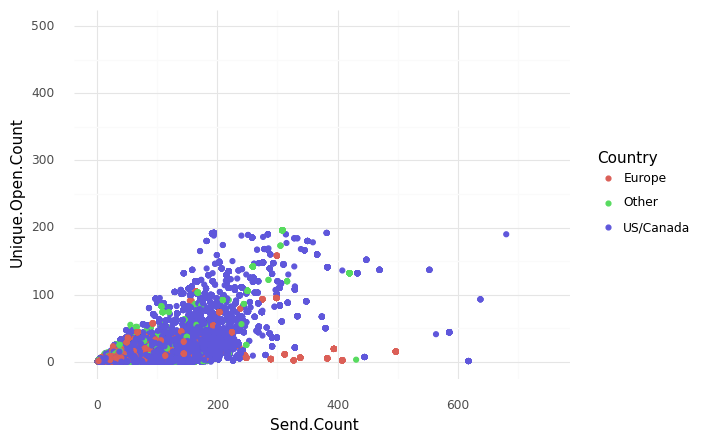

<ggplot: (8777550375305)>

In [ ]:
(ggplot(web, aes(x = "Send.Count", y = "Unique.Open.Count",
                 color="Country")) + xlim(-1,750)+ylim(-1,500)+
 geom_point() + theme_minimal())

<H1> Modeling

<h2> Linear regression

In [ ]:
# Linear regression model
# ALL DATA
predictors = ["Send.Count", "Unique.Open.Count", "Unique.Click.Count"]
X = df[predictors]
y = df["subscriptionLength_months"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# zscoring
z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.fit_transform(X_test[predictors])

# building and fitting model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train: " , mean_absolute_error(y_train, lr.predict(X_train)))
print("Test: " , mean_absolute_error(y_test, lr.predict(X_test)))

Train:  313.72575571391656
Test:  313.51250472536367


In [ ]:
# OVER JUST IOS
predictors = ["Send.Count", "Unique.Open.Count", "Unique.Click.Count"]
X2 = ios[predictors]
y2 = ios["subscriptionLength_months"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)


# zscoring
z = StandardScaler()
X2_train[predictors] = z.fit_transform(X2_train[predictors])
X2_test[predictors] = z.fit_transform(X2_test[predictors])

# building and fitting model
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

print("Train: " , mean_absolute_error(y2_train, lr2.predict(X2_train)))
print("Test: " , mean_absolute_error(y2_test, lr2.predict(X2_test)))

Train:  347.68212312504903
Test:  347.2410193765053


In [ ]:
# IOS WITH  PREDICTING OPEN COUNT
# SELLING NEW PRODUCTS

# OVER JUST IOS
predictors_new = ["Send.Count", "Unique.Click.Count"]
X2 = ios[predictors_new]
y2 = ios["Unique.Open.Count"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)


# zscoring
z = StandardScaler()
X2_train[predictors_new] = z.fit_transform(X2_train[predictors_new])
X2_test[predictors_new] = z.fit_transform(X2_test[predictors_new])

# building and fitting model
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

print("Train: " , mean_absolute_error(y2_train, lr2.predict(X2_train)))
print("Test: " , mean_absolute_error(y2_test, lr2.predict(X2_test)))

Train:  5.698450654672169
Test:  5.70599049361117


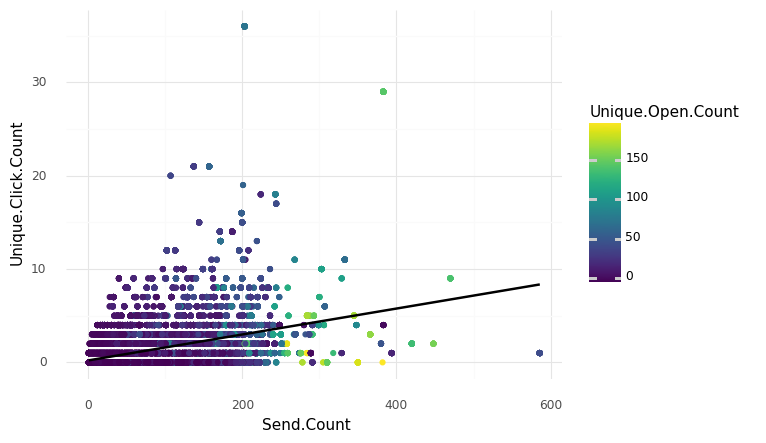

<ggplot: (8786484597729)>

In [ ]:
(ggplot(ios, aes(x = "Send.Count", y = "Unique.Click.Count",
                 color="Unique.Open.Count")) +
 geom_point() + theme_minimal()+ stat_smooth(method="lm"))

IOS predicting open count was the most accurate linear regression.

In [ ]:
# OVER JUST android
predictors = ["Send.Count", "Unique.Open.Count", "Unique.Click.Count"]
X3 = android[predictors]
y3 = android["subscriptionLength_months"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25)


# zscoring
z = StandardScaler()
X3_train[predictors] = z.fit_transform(X3_train[predictors])
X3_test[predictors] = z.fit_transform(X3_test[predictors])

# building and fitting model
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)

print("Train: " , mean_absolute_error(y3_train, lr3.predict(X3_train)))
print("Test: " , mean_absolute_error(y3_test, lr3.predict(X3_test)))

Train:  241.59647963442822
Test:  242.6500417353618


In [ ]:
# TRYING TO SEE WHICH VARIABLES MATTER MOST WHEN PURCHASING?
# Purchase store - where it was purchases
  # lead platform - platform used to engage w products (web,app,unknown)
      # App.session.platform - platform used to access content
        # country - which country

<h2> MODELS OVER WEB DATA 

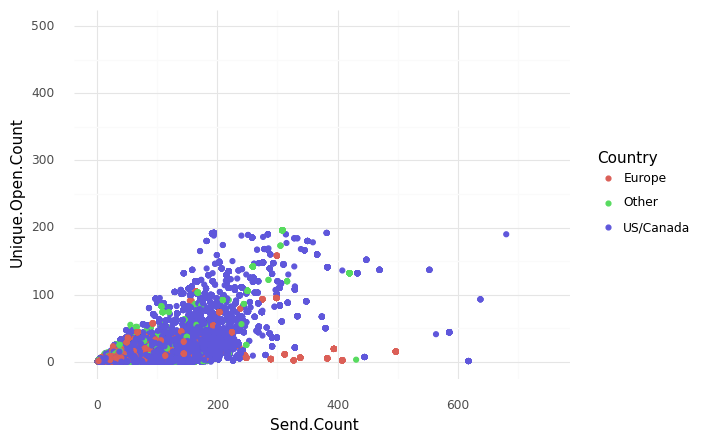

<ggplot: (8777544571921)>

In [ ]:
(ggplot(web, aes(x = "Send.Count", y = "Unique.Open.Count",
                 color="Country")) + xlim(-1,750)+ylim(-1,500)+
 geom_point() + theme_minimal())

In [ ]:
# Linear regression model
# WEB
predictors6 = ["Send.Count", "Unique.Open.Count", "Unique.Click.Count"]
X6 = df[predictors6]
y6 = df["Country"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.25)

# zscoring
z = StandardScaler()
X6_train[predictors6] = z.fit_transform(X6_train[predictors6])
X6_test[predictors6] = z.fit_transform(X6_test[predictors6])

# building and fitting model
lr6 = LinearRegression()
lr6.fit(X6_train, y6_train)

print("Train: " , mean_absolute_error(y6_train, lr6.predict(X6_train)))
print("Test: " , mean_absolute_error(y6_test, lr6.predict(X6_test)))

In [ ]:
# clustering web data

# k means model
predictors6 = ["Send.Count", "Unique.Open.Count", "Unique.Click.Count"]
X6 = web[predictors6]
y6 = web["Country"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.25)

km6 = KMeans(n_clusters = 3)
km6.fit(X6)

pred = km6.predict(X6)
X6["clusters"] = pred

silhouette_score(X6, pred)

0.7756717178866481

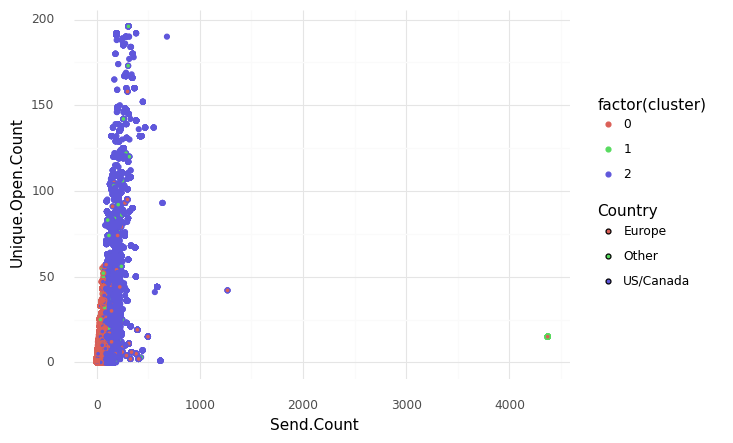

<ggplot: (8777549911701)>

In [ ]:
# graphing clusters on web data
# based on send count, open count, unique click count
# clustering by Country
web["cluster"] = pred
(ggplot(web, aes(x = "Send.Count", y = "Unique.Open.Count",
                  color = "factor(cluster)",fill ="Country")) +
 geom_point() + theme_minimal())

In [ ]:
# tryinh hierarchial clustering using 3 features

features = ["Send.Count", "Unique.Open.Count", "Unique.Click.Count"]
x = web[predictors6]

z = StandardScaler()
x[features] = z.fit_transform(x)

hac = AgglomerativeClustering(affinity = "euclidean", linkage = "ward") 
hac.fit(x)

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

<h2> Ridge Regression


In [ ]:
# ridge regression

lr_rr = Ridge()
# over ios
lr_rr.fit(X2_train, y2_train)

print("Train: " , mean_absolute_error(y2_train, lr_rr.predict(X2_train)))
print("Test: " , mean_absolute_error(y2_test, lr_rr.predict(X2_test)))



Train:  347.68221868453065
Test:  347.2411205064636


The ridge regression model over the ios data was not very accurate, resulting in mean absolute error for both training and test set of about 347. This was a major improvement of doing it over all the data with all the different platforms, but it is still not ideal

In [ ]:
# ridge regression

lr_rr3 = Ridge()
# over android
lr_rr3.fit(X3_train, y3_train)

print("Train: " , mean_absolute_error(y3_train, lr_rr3.predict(X3_train)))
print("Test: " , mean_absolute_error(y3_test, lr_rr3.predict(X3_test)))

Train:  241.5965808376324
Test:  242.65014663972747


<h2> Kmeans

In [ ]:
# k means model
# IOS

km = KMeans(n_clusters = 10)
km.fit(X2)

membership = km.predict(X2)
X2["clusters"] = membership

silhouette_score(X2, membership)

0.6078239679775439

In [ ]:
# k means model
# android

km = KMeans(n_clusters = 10)
km.fit(X3)

predAndroid = km.predict(X3)
X3["clusters"] = predAndroid

silhouette_score(X3, predAndroid)

0.6441720340215784

<h2> Subscribers who can be sold additional products

In [ ]:
# Volume between platforms WEB/APP and countries
# which variables contribute to the volume (demo user? email Subscriber? push notifications?)
      # for web we can look at Purchase.Amount.USD and model to predict that 


# could predict purchase.store 


df = pd.read_csv("https://raw.githubusercontent.com/tmoore-byte/MGSC-410/main/subscriptionData.csv")
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


value = df[].quantile(0.98)
df = df.replace(np.inf, value)

KeyError: ignored

In [ ]:
 # creating random forest to find which segments have low posibilities 
 # of renewing their product


 # df.describe()


 df = pd.get_dummies(ios)

 df.iloc[:,5:].head(5)

,Email.Subscriber,Push.Notifications,Send.Count,Unique.Open.Count,Unique.Click.Count,subscriptionLength_months,UniqueOpenRate,UniqueClickRate,Exchange rates,Purchase.Amount.USD,...,unique Currencies_CAD,unique Currencies_GBP,unique Currencies_HKD,unique Currencies_JPY,unique Currencies_KRW,unique Currencies_MXN,unique Currencies_RON,unique Currencies_THB,unique Currencies_TRY,unique Currencies_VND
1,1,1,1,0,0,12,0.00,0.00,0.80,0.00,...,0,1,0,0,0,0,0,0,0,0
4,1,1,25,7,2,3,0.28,0.08,1.28,38.40,...,1,0,0,0,0,0,0,0,0,0
6,1,1,94,0,0,3,0.00,0.00,130.59,35.97,...,0,0,0,1,0,0,0,0,0,0
7,0,1,70,2,0,14,0.03,0.00,14.79,13.54,...,0,0,0,0,0,0,0,0,1,0
8,1,1,174,28,2,24,0.16,0.01,1.40,143.76,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# labels are predictions
labels = np.array(df['Unique.Open.Count'])

# removing labels from df
df= df.drop('Unique.Open.Count', axis = 1)

# saving df names 
df_list = list(df.columns)

#array
df = np.array(df)




In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(df,
                                                                            labels,
                                                                            test_size = 0.25,
                                                                            random_state = 42)



In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (124143, 85)
Training Labels Shape: (124143,)
Testing Features Shape: (41382, 85)
Testing Labels Shape: (41382,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

ValueError: ignored

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# trying linear regression

# ALL DATA
predictors = ["Send.Count", "Unique.Click.Count", "Demo.User",
              "Free.Trial.User", "Auto.Renew", "Push.Notifications"]
X = df[predictors]
y = df["Unique.Open.Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# zscoring
z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.fit_transform(X_test[predictors])

# building and fitting model
lr = LinearRegression()
model = lr.fit(X_train, y_train)

print("Train: " , mean_absolute_error(y_train, lr.predict(X_train)))
print("Test: " , mean_absolute_error(y_test, lr.predict(X_test)))

Train:  4.636967817517326
Test:  4.67689617904918


MAE of 4.6 for both train and test set, average absolute difference between the true and predicted values. Model was pretty good at predicting Unique.Open.Count (potential new customers) when looking at if the user was a demo user, free trial user, auto renewal user, push notifications, send count total and unique click counts
